In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("8358_1.csv")

In [3]:
df.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


# Preprocessing and Feature engineerin

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3510 non-null   object 
 1   address             3510 non-null   object 
 2   categories          3510 non-null   object 
 3   city                3510 non-null   object 
 4   country             3510 non-null   object 
 5   keys                3510 non-null   object 
 6   latitude            3510 non-null   float64
 7   longitude           3510 non-null   float64
 8   menuPageURL         610 non-null    object 
 9   menus.amountMax     2948 non-null   float64
 10  menus.amountMin     2948 non-null   float64
 11  menus.currency      2951 non-null   object 
 12  menus.dateSeen      3510 non-null   object 
 13  menus.description   1526 non-null   object 
 14  menus.name          3510 non-null   object 
 15  name                3510 non-null   object 
 16  postal

**this dataset is full of nans lets see how to handel them**

In [6]:
df.isnull().sum()

id                       0
address                  0
categories               0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
menuPageURL           2900
menus.amountMax        562
menus.amountMin        562
menus.currency         559
menus.dateSeen           0
menus.description     1984
menus.name               0
name                     0
postalCode              26
priceRangeCurrency    1953
priceRangeMin         1953
priceRangeMax         1953
province                 0
dtype: int64

**I will drop:**

**id and menuepageurl and keys and name since they are useless**

**city and country and province since I have longitute and latitude**

**also menues date seen sice the data won't effect the clustering(even if prices have chainged It won't matter)**

**and menue description since it has a lot of unreplaceable datas**

**and postal code(it would be usefull but we have longitude and latitude also it contains characters beside numbers)**

In [7]:
df=df.drop(["id","address","city","country","keys","menuPageURL","menus.dateSeen","menus.description","province","postalCode"],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   categories          3510 non-null   object 
 1   latitude            3510 non-null   float64
 2   longitude           3510 non-null   float64
 3   menus.amountMax     2948 non-null   float64
 4   menus.amountMin     2948 non-null   float64
 5   menus.currency      2951 non-null   object 
 6   menus.name          3510 non-null   object 
 7   name                3510 non-null   object 
 8   priceRangeCurrency  1557 non-null   object 
 9   priceRangeMin       1557 non-null   float64
 10  priceRangeMax       1557 non-null   float64
dtypes: float64(6), object(5)
memory usage: 301.8+ KB


In [9]:
len(list(df["categories"].unique()))

561

**I will drop those columns which have a lot of unique labels**

In [10]:
df=df.drop("categories",axis=1)

In [11]:
df["menus.currency"].value_counts()

USD    2951
Name: menus.currency, dtype: int64

**since all of them are the same I will drop it**

In [12]:
df=df.drop("menus.currency",axis=1)

In [13]:
len(list(df["menus.name"].unique()))

1598

In [14]:
df=df.drop("menus.name",axis=1)

In [15]:
len(list(df["name"].unique()))

933

In [16]:
df=df.drop("name",axis=1)

In [17]:
df["priceRangeCurrency"].value_counts()

USD    1557
Name: priceRangeCurrency, dtype: int64

In [18]:
df=df.drop("priceRangeCurrency",axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         3510 non-null   float64
 1   longitude        3510 non-null   float64
 2   menus.amountMax  2948 non-null   float64
 3   menus.amountMin  2948 non-null   float64
 4   priceRangeMin    1557 non-null   float64
 5   priceRangeMax    1557 non-null   float64
dtypes: float64(6)
memory usage: 164.7 KB


**In order to find and replace nans of price range min and max I should search the realtion in a correlation**

<AxesSubplot:>

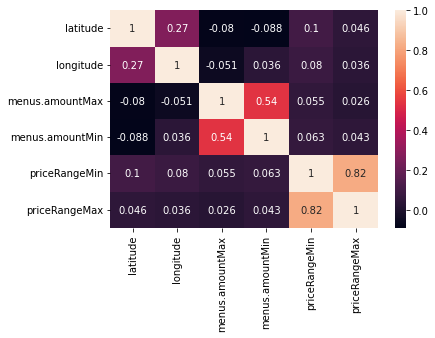

In [20]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

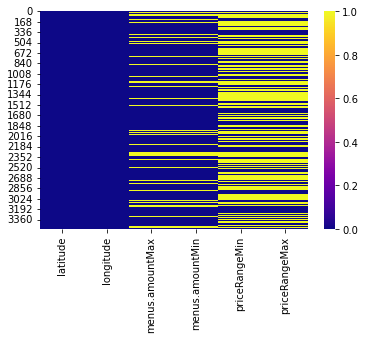

In [21]:
sns.heatmap(df.isnull(),cmap="plasma")

**there is lots of missing values I have to drop them**
**I dont have enough data for knn to predict them most of them are missing values**

In [22]:
df=df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 2 to 3508
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         1273 non-null   float64
 1   longitude        1273 non-null   float64
 2   menus.amountMax  1273 non-null   float64
 3   menus.amountMin  1273 non-null   float64
 4   priceRangeMin    1273 non-null   float64
 5   priceRangeMax    1273 non-null   float64
dtypes: float64(6)
memory usage: 69.6 KB


In [24]:
df.describe()

,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,38.760052,-88.897909,13.019026,11.561642,15.699921,36.442262
std,4.508782,17.747033,18.974375,8.638721,18.522326,21.743502
min,18.411826,-157.829139,0.350000,0.350000,0.000000,12.000000
25%,36.101983,-97.366614,7.990000,7.990000,0.000000,30.000000
50%,40.140363,-81.363427,11.950000,10.990000,25.000000,40.000000
75%,41.261384,-74.254118,15.000000,14.000000,25.000000,40.000000
max,48.083900,-66.024871,312.950000,118.990000,347.000000,666.000000


# PCA

In [37]:
from sklearn.decomposition import PCA

In [41]:
pca=PCA(2)

In [42]:
df_pca=pd.DataFrame(pca.fit_transform(df))

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

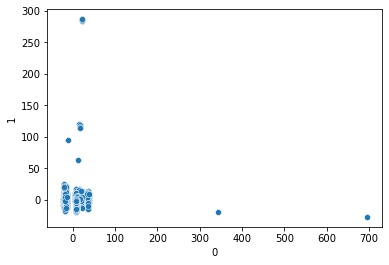

In [43]:
sns.scatterplot(df_pca[0],df_pca[1])

**those points are missing values let's dropt them**

In [72]:
df_pca = df_pca.loc[(df_pca[0] < 300) & (df_pca[1] < 50)]

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

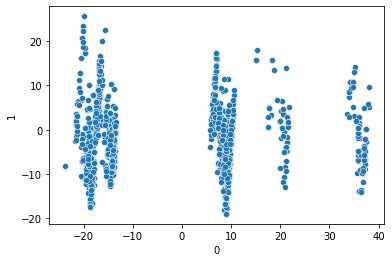

In [73]:
sns.scatterplot(df_pca[0],df_pca[1])

**So dataset has 4 or even 5 clusters**

# Kmeans

In [26]:
from sklearn.cluster import KMeans

In [75]:
wcss=[]
for i in range(2,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

**------elbow method-----**

([<matplotlib.axis.XTick at 0x242e3c886a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

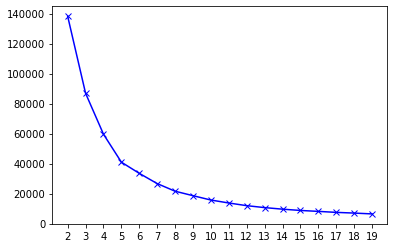

In [76]:
plt.plot(range(2,20),wcss,"bx-")
plt.xticks(range(2,20))

In [79]:
kmeans=KMeans(n_clusters=5)

In [80]:
label=kmeans.fit(df_pca).labels_

**so the elbow is at 5**

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

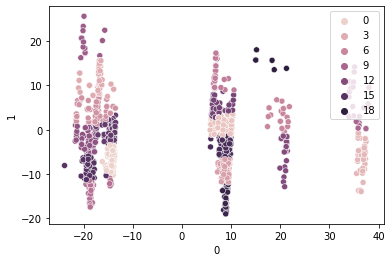

In [78]:
sns.scatterplot(df_pca[0],df_pca[1],hue=label)

**------silhouette method---------**

In [36]:
from sklearn.metrics import silhouette_score

In [ ]:
slh=[]
for i in range(2,20):
    